# Analyzing the relationship between pesticide use and cancer incidence in the US by county

## Intro

This notebook contains 2 primary datasets obtained from Kaggle. The pesticide dataset is composed of 3 sets: 2014, 2015, and a key containing the state and county names. The cancer dataset is a single dataset. First I merge the Pesticide dataset into a single dataframe. And then I merge the Pesticide dataframe with the Cancer dataframe. Later I use simple line charts to plot pesticide use rates alongside cancer incidence. 

## Applications

By combining these datasets we are able to observe any relationship that exists between pesticide use and cancer incidence. This relationship could have important implications for the farming industry and the health of its workers.

In [478]:
import numpy as np

In [479]:
import pandas as pd

In [480]:
import matplotlib.pyplot as plt

## Merge Pesticide datasets

In [481]:
df2014=pd.read_csv("file://localhost/Users/anissakhan/Dropbox/Nissa_stuff/KU_CS/EECS731/731-Project-1/Data/718_1342_bundle_archive/2014.csv")

In [482]:
df2015=pd.read_csv("file://localhost/Users/anissakhan/Dropbox/Nissa_stuff/KU_CS/EECS731/731-Project-1/Data/718_1342_bundle_archive/2015.csv")

In [483]:
dfKey=pd.read_csv("file://localhost/Users/anissakhan/Dropbox/Nissa_stuff/KU_CS/EECS731/731-Project-1/Data/718_1342_bundle_archive/dictionary.csv")

In [484]:
dfCancer=pd.read_csv("file://localhost/Users/anissakhan/Dropbox/Nissa_stuff/KU_CS/EECS731/731-Project-1/Data/cancer_incidence_by_county.csv")

Create a data set that merges the 2014 and 2015 dataset (merged vertically).
I used ignore_index=True so that the index would not repeat across the 2 datasets.

In [485]:
frames = [df2014, df2015]

In [486]:
dfPestNoKey = pd.concat(frames, ignore_index=True)

Check how many unique county names exist in each dataset: Pesticide dataset (dfKey) and Cancer dataset (dfCancer)

In [487]:
dfKey.COUNTY.nunique()

1969

In [488]:
dfCancer.county.nunique()

2084

Merge Pesticide dataset with its State and County names

In [489]:
dfPest=pd.merge(dfPestNoKey, dfKey, left_on=['COUNTY_CODE', 'STATE_CODE'], right_on=['COUNTY_CODE', 'STATE_CODE'])

In [490]:
dfPest.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE,COUNTY,STATE
0,"2,4-D",2014,1,1,1698.6,1885.5,Autauga County,AL
1,"2,4-DB",2014,1,1,82.8,264.3,Autauga County,AL
2,Abamectin,2014,1,1,8.6,8.9,Autauga County,AL
3,Acephate,2014,1,1,707.9,707.9,Autauga County,AL
4,Acetochlor,2014,1,1,649.5,859.5,Autauga County,AL


## Cleaning the data

In [491]:
dfCancer.head()

,Unnamed: 0,county,incidence_rate_per_100k,avg_annual_count,recent_trend,five_year_incidence_change_rate,stateFIPS,incidence_rate_per_100k_low_95,incidence_rate_per_100k_high_95,five_year_incidence_change_rate_low_95,five_year_incidence_change_rate_high_95
0,0,Chambers County,522.8,240,stable,-1.5,1,492.7,554.5,-6.5,3.7
1,1,Walker County,515.8,447,stable,0.2,1,494.0,538.4,-2.8,3.2
2,2,Lowndes County,513.3,71,rising,11.2,1,459.8,571.8,6.3,16.3
3,3,Dallas County,510.0,258,stable,0.7,1,481.6,539.7,-9.8,12.4
4,4,Autauga County,495.6,304,stable,-0.2,1,470.6,521.5,-9.0,9.6


Delete unnecessary column (Unnamed: 0):

In [492]:
dfCancer=dfCancer.drop(columns='Unnamed: 0')

In [493]:
dfCancer.head()

,county,incidence_rate_per_100k,avg_annual_count,recent_trend,five_year_incidence_change_rate,stateFIPS,incidence_rate_per_100k_low_95,incidence_rate_per_100k_high_95,five_year_incidence_change_rate_low_95,five_year_incidence_change_rate_high_95
0,Chambers County,522.8,240,stable,-1.5,1,492.7,554.5,-6.5,3.7
1,Walker County,515.8,447,stable,0.2,1,494.0,538.4,-2.8,3.2
2,Lowndes County,513.3,71,rising,11.2,1,459.8,571.8,6.3,16.3
3,Dallas County,510.0,258,stable,0.7,1,481.6,539.7,-9.8,12.4
4,Autauga County,495.6,304,stable,-0.2,1,470.6,521.5,-9.0,9.6


Check summary statistics 

In [494]:
dfPest.describe()

,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE
count,762196.000000,762196.000000,762196.000000,5.209890e+05,7.621960e+05
mean,2014.485128,30.957291,94.823353,1.496135e+03,1.182863e+03
std,0.499779,14.666494,85.567998,1.849983e+04,1.569203e+04
min,2014.000000,1.000000,1.000000,0.000000e+00,0.000000e+00
25%,2014.000000,19.000000,35.000000,9.000000e-01,1.500000e+00
50%,2014.000000,30.000000,77.000000,1.210000e+01,1.640000e+01
75%,2015.000000,45.000000,129.000000,1.327000e+02,1.405000e+02
max,2015.000000,56.000000,810.000000,5.507146e+06,5.507146e+06


The pesticide dataset contains missing (NaN) values in the low_estimate variable (as seen in the below table). From the dataset documentation, we know the following: if a county did not report pesticide use, "low estimates assumed zero use in the district for that pesticide; however, high estimates treated the unreported use of pesticides as missing data and estimated the pesticide usage from neighboring locations within the same region." Therefore, low_estimate values should contain either 0 or a value. If it is missing, we need to handle that in a different way. 

In [495]:
dfPest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762196 entries, 0 to 762195
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   COMPOUND       762196 non-null  object 
 1   YEAR           762196 non-null  int64  
 2   STATE_CODE     762196 non-null  int64  
 3   COUNTY_CODE    762196 non-null  int64  
 4   LOW_ESTIMATE   520989 non-null  float64
 5   HIGH_ESTIMATE  762196 non-null  float64
 6   COUNTY         762196 non-null  object 
 7   STATE          762196 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 52.3+ MB


In [496]:
dfCancer.describe()

,stateFIPS,incidence_rate_per_100k_low_95,incidence_rate_per_100k_high_95,five_year_incidence_change_rate_low_95,five_year_incidence_change_rate_high_95
count,3007.000000,2802.000000,2802.000000,2788.000000,2788.000000
mean,30.475557,410.834868,489.252677,-8.198924,9.326220
std,14.995741,63.757158,64.413099,8.497521,13.807583
min,1.000000,72.900000,1.000000,-69.200000,-13.100000
25%,18.000000,377.800000,453.400000,-11.500000,1.300000
50%,30.000000,421.600000,488.100000,-5.900000,5.500000
75%,45.000000,454.675000,523.200000,-2.000000,12.300000
max,56.000000,586.600000,974.300000,11.500000,199.700000


The cancer dataset contains missing values (Nan) in the variables listed in columns 6, 7, 8, and 9 in the table below. For any analysis of the effect of pesticide use on cancer rates, we will likely be using avg_annual_count and incidence_rate_per_100k. There are no missing values in these variables of interest, therefore we will leave the NaN values as is.

In [497]:
dfCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   county                                   3007 non-null   object 
 1   incidence_rate_per_100k                  3007 non-null   object 
 2   avg_annual_count                         3007 non-null   object 
 3   recent_trend                             3007 non-null   object 
 4   five_year_incidence_change_rate          3007 non-null   object 
 5   stateFIPS                                3007 non-null   int64  
 6   incidence_rate_per_100k_low_95           2802 non-null   float64
 7   incidence_rate_per_100k_high_95          2802 non-null   float64
 8   five_year_incidence_change_rate_low_95   2788 non-null   float64
 9   five_year_incidence_change_rate_high_95  2788 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage:

Rename Column names for state code (from STATE_CODE to stateFIPS) and county name (from COUNTY to county) to match the other dataset. This is done for ease of analysis.

In [498]:
dfPest.columns

Index(['COMPOUND', 'YEAR', 'STATE_CODE', 'COUNTY_CODE', 'LOW_ESTIMATE',
       'HIGH_ESTIMATE', 'COUNTY', 'STATE'],
      dtype='object')

In [499]:
dfPest.columns=['COMPOUND', 'YEAR', 'stateFIPS', 'COUNTY_CODE', 'LOW_ESTIMATE',
       'HIGH_ESTIMATE', 'county', 'STATE']

Check the datatypes to verify ability to merge

In [500]:
dfPest.dtypes

COMPOUND          object
YEAR               int64
stateFIPS          int64
COUNTY_CODE        int64
LOW_ESTIMATE     float64
HIGH_ESTIMATE    float64
county            object
STATE             object
dtype: object

In [501]:
dfCancer.dtypes

county                                      object
incidence_rate_per_100k                     object
avg_annual_count                            object
recent_trend                                object
five_year_incidence_change_rate             object
stateFIPS                                    int64
incidence_rate_per_100k_low_95             float64
incidence_rate_per_100k_high_95            float64
five_year_incidence_change_rate_low_95     float64
five_year_incidence_change_rate_high_95    float64
dtype: object

Convert county from object to string for both datasets to enable merge on county name (since cancer dataset doesn't have a county code, we can't use county code for merge)

Also need to convert avg_annual_count from an object to a float so that plotting is possible.

In [502]:
dfCancer['county'] = dfCancer['county'].astype("string")

In [503]:
dfPest['county'] = dfPest['county'].astype("string")

In [504]:
dfCancer['recent_trend'] = dfCancer['recent_trend'].astype("string")

In [505]:
dfCancer['avg_annual_count'] = pd.to_numeric(dfCancer.avg_annual_count, errors='coerce')

Verify type of county is now a string, and avg_annual_count is now a float

In [506]:
dfCancer.dtypes

county                                      string
incidence_rate_per_100k                     object
avg_annual_count                           float64
recent_trend                                string
five_year_incidence_change_rate             object
stateFIPS                                    int64
incidence_rate_per_100k_low_95             float64
incidence_rate_per_100k_high_95            float64
five_year_incidence_change_rate_low_95     float64
five_year_incidence_change_rate_high_95    float64
dtype: object

Strip extra spaces at the end of dfCancer.county string (I used dfCancer.county = dfCancer.county.str.encode(
'utf-8') and dfPest.county=dfPest.county.str.encode('utf-8') to verify whether or not the strings were the same. The dfCancer string had extra spaces at the end of its string; therefore I stripped those spaces using the following command:

In [507]:
dfCancer.county = dfCancer.county.str.strip()

## Merging Pesticide and Cancer datasets

Create 2 datasets from the Pesticide dataset. Select only the pesticide Glyphosate from the pesticide data for ease of analysis.

In [508]:
dfGlyph=dfPest.query("COMPOUND == 'Glyphosate'")[['COMPOUND', 'YEAR', 'stateFIPS', 'COUNTY_CODE', 'LOW_ESTIMATE',
       'HIGH_ESTIMATE', 'county', 'STATE']]

In [509]:
dfGlyphCombined=pd.merge(dfGlyph, dfCancer, left_on=['county', 'stateFIPS'], right_on=['county', 'stateFIPS'])

Create a dataset that combines all the Pesticides data and the Cancer data

In [510]:
dfAllCombined=pd.merge(dfPest, dfCancer, left_on=['county', 'stateFIPS'], right_on=['county', 'stateFIPS'])

In [511]:
dfAllCombined.head()

,COMPOUND,YEAR,stateFIPS,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE,county,STATE,incidence_rate_per_100k,avg_annual_count,recent_trend,five_year_incidence_change_rate,incidence_rate_per_100k_low_95,incidence_rate_per_100k_high_95,five_year_incidence_change_rate_low_95,five_year_incidence_change_rate_high_95
0,"2,4-D",2014,1,1,1698.6,1885.5,Autauga County,AL,495.6,304.0,stable,-0.2,470.6,521.5,-9.0,9.6
1,"2,4-DB",2014,1,1,82.8,264.3,Autauga County,AL,495.6,304.0,stable,-0.2,470.6,521.5,-9.0,9.6
2,Abamectin,2014,1,1,8.6,8.9,Autauga County,AL,495.6,304.0,stable,-0.2,470.6,521.5,-9.0,9.6
3,Acephate,2014,1,1,707.9,707.9,Autauga County,AL,495.6,304.0,stable,-0.2,470.6,521.5,-9.0,9.6
4,Acetochlor,2014,1,1,649.5,859.5,Autauga County,AL,495.6,304.0,stable,-0.2,470.6,521.5,-9.0,9.6


Export combined dataset to csv file

In [512]:
dfAllCombined.to_csv('finalDataset.csv')

In [513]:
dfGlyphCombined.to_csv('glyphosateCombinedData.csv')

## Visualization

Here, we make some simple line graphs which plot the high and low pesticide estimates (for glyphosate only) alongside the average annual cancer count for specific counties. I chose to choose 3 counties--one from each category of cancer trend rate. These categories are rising, stable, and falling.

The graphs below do not provide much value as they are now, since it is difficult to see the trend of the cancer counts due to scale of the graph when plotted with the pesticide rates. However, we can glean some information based on the recent trend compared to the graphs:

1. For the county where the cancer rates are trending up, the graph shows an increase in the pesticide estimates.
2. For the county where the cancer rates are stable, the graph doesn't show any conclusive trend in pesticide use.
3. For the county where the cancer rates are trending down, the graph shows a decrease in the rate of pesticide use.

In [514]:
dfGlyphCombined.query("recent_trend == 'rising'")[['COMPOUND', 'YEAR', 'stateFIPS', 'COUNTY_CODE', 'county', 'STATE', 'recent_trend']].head()

,COMPOUND,YEAR,stateFIPS,COUNTY_CODE,county,STATE,recent_trend
40,Glyphosate,2014,1,41,Crenshaw County,AL,rising
41,Glyphosate,2015,1,41,Crenshaw County,AL,rising
50,Glyphosate,2014,1,51,Elmore County,AL,rising
51,Glyphosate,2015,1,51,Elmore County,AL,rising
84,Glyphosate,2014,1,85,Lowndes County,AL,rising


In [515]:
dfGlyphCombined.query("recent_trend == 'stable'")[['COMPOUND', 'YEAR', 'stateFIPS', 'COUNTY_CODE', 'county', 'STATE', 'recent_trend']].head()

,COMPOUND,YEAR,stateFIPS,COUNTY_CODE,county,STATE,recent_trend
0,Glyphosate,2014,1,1,Autauga County,AL,stable
1,Glyphosate,2015,1,1,Autauga County,AL,stable
2,Glyphosate,2014,1,3,Baldwin County,AL,stable
3,Glyphosate,2015,1,3,Baldwin County,AL,stable
4,Glyphosate,2014,1,5,Barbour County,AL,stable


In [516]:
dfGlyphCombined.query("recent_trend == 'falling'")[['COMPOUND', 'YEAR', 'stateFIPS', 'COUNTY_CODE', 'county', 'STATE', 'recent_trend']].tail()

,COMPOUND,YEAR,stateFIPS,COUNTY_CODE,county,STATE,recent_trend
3970,Glyphosate,2015,53,75,Whitman County,WA,falling
4109,Glyphosate,2014,55,27,Dodge County,WI,falling
4110,Glyphosate,2015,55,27,Dodge County,WI,falling
4250,Glyphosate,2014,56,25,Natrona County,WY,falling
4251,Glyphosate,2015,56,25,Natrona County,WY,falling


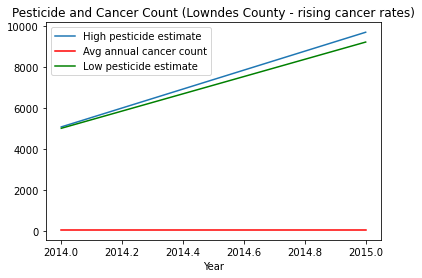

In [517]:
ax = plt.gca()

dfGlyphCombined.query("county == 'Lowndes County' and COUNTY_CODE==85").plot(kind='line',x='YEAR',y='HIGH_ESTIMATE',ax=ax)
dfGlyphCombined.query("county == 'Lowndes County' and COUNTY_CODE==85").plot(kind='line',x='YEAR',y='avg_annual_count', color='red', ax=ax)
dfGlyphCombined.query("county == 'Lowndes County' and COUNTY_CODE==85").plot(kind='line',x='YEAR',y='LOW_ESTIMATE', color='green', ax=ax)

plt.title('Pesticide and Cancer Count (Lowndes County - rising cancer rates)')
plt.xlabel('Year')
ax.legend(["High pesticide estimate", "Avg annual cancer count", "Low pesticide estimate"]);

plt.show()

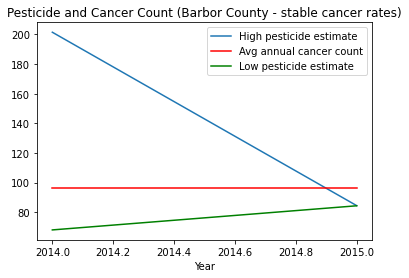

In [518]:
ax = plt.gca()

dfGlyphCombined.query("county == 'Barbour County' and COUNTY_CODE==1").plot(kind='line',x='YEAR',y='HIGH_ESTIMATE',ax=ax)
dfGlyphCombined.query("county == 'Barbour County' and COUNTY_CODE==1").plot(kind='line',x='YEAR',y='avg_annual_count', color='red', ax=ax)
dfGlyphCombined.query("county == 'Barbour County' and COUNTY_CODE==1").plot(kind='line',x='YEAR',y='LOW_ESTIMATE', color='green', ax=ax)

plt.title('Pesticide and Cancer Count (Barbor County - stable cancer rates)')
plt.xlabel('Year')
ax.legend(["High pesticide estimate", "Avg annual cancer count", "Low pesticide estimate"]);

plt.show()

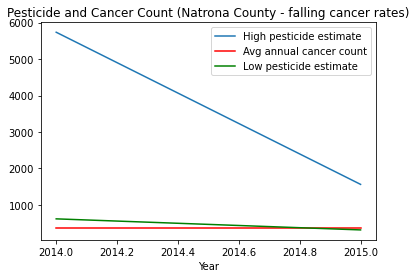

In [519]:
ax = plt.gca()

dfGlyphCombined.query("county == 'Natrona County' and COUNTY_CODE==25").plot(kind='line',x='YEAR',y='HIGH_ESTIMATE',ax=ax)
dfGlyphCombined.query("county == 'Natrona County' and COUNTY_CODE==25").plot(kind='line',x='YEAR',y='avg_annual_count', color='red', ax=ax)
dfGlyphCombined.query("county == 'Natrona County' and COUNTY_CODE==25").plot(kind='line',x='YEAR',y='LOW_ESTIMATE', color='green', ax=ax)

plt.title('Pesticide and Cancer Count (Natrona County - falling cancer rates)')
plt.xlabel('Year')
ax.legend(["High pesticide estimate", "Avg annual cancer count", "Low pesticide estimate"]);

plt.show()

## Summary

Based on a cursory look at pesticide rates and cancer incidence trends, it appears that the two move together. In other words, as pesticide use rises, cancer rates rise and vice versa. This is of course only a general hypothesis. More rigourous analysis would be needed to determine a correlation and perhaps even causation between the two. As an expansion I would like to group the data by states, and also create a map graphic of count by state.